<a href="https://colab.research.google.com/github/YoweioY/house-price-forecast/blob/master/fs_yowei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#房價預測
張祐瑋

## 讀檔

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

#匯入tensorflow的函式庫
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Lambda, Conv2D, MaxPool2D, Concatenate, AveragePooling2D

#匯入
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
# 連結google drive
from google.colab import drive
drive.mount('/content/drive')

# 創建列名
cols = ['id','bedrooms', 'bathrooms', 'area', 'postcode', 'price', 'bathroomphoto', 'bedroomphoto' , 'housephoto', 'kitchenphoto']

df_train = pd.read_csv('/content/drive/MyDrive/foresight/Train.csv', names=cols)
df_test = pd.read_csv('/content/drive/MyDrive/foresight/Test.csv', names=cols)


Mounted at /content/drive


In [ ]:
# 分割字符串

for i in range(len(df_train)):
    row = df_train.loc[i,'id'].replace('\t', ' ')
    row = row.split(' ')

    df_train.loc[i, 'bedrooms'] = float(row[1])
    df_train.loc[i, 'bathrooms'] = float(row[2])
    df_train.loc[i, 'area'] = float(row[3])
    df_train.loc[i, 'postcode'] = float(row[4])
    df_train.loc[i, 'price'] = float(row[5])
    df_train.loc[i, 'bathroomphoto'] = row[6]
    df_train.loc[i, 'bedroomphoto'] = row[7]
    df_train.loc[i, 'housephoto'] = row[8]
    df_train.loc[i, 'kitchenphoto'] = row[9]

for i in range(len(df_test)):
    row = df_test.loc[i,'id'].replace('\t', ' ')
    row = row.split(' ')

    df_test.loc[i, 'bedrooms'] = float(row[1])
    df_test.loc[i, 'bathrooms'] = float(row[2])
    df_test.loc[i, 'area'] = float(row[3])
    df_test.loc[i, 'postcode'] = float(row[4])
    df_test.loc[i, 'price'] = float(row[5])
    df_test.loc[i, 'bathroomphoto'] = row[6]
    df_test.loc[i, 'bedroomphoto'] = row[7]
    df_test.loc[i, 'housephoto'] = row[8]
    df_test.loc[i, 'kitchenphoto'] = row[9]

## 前處理
1. 遺失值 2. EDA 3. 標準化 4. 偏態

In [ ]:
# 檢查遺失值
print(df_train.isna().sum())
print(df_test.isna().sum())

id               0
bedrooms         0
bathrooms        0
area             0
postcode         0
price            0
bathroomphoto    0
bedroomphoto     0
housephoto       0
kitchenphoto     0
dtype: int64
id               0
bedrooms         0
bathrooms        0
area             0
postcode         0
price            0
bathroomphoto    0
bedroomphoto     0
housephoto       0
kitchenphoto     0
dtype: int64


In [ ]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             450 non-null    object 
 1   bedrooms       450 non-null    float64
 2   bathrooms      450 non-null    float64
 3   area           450 non-null    float64
 4   postcode       450 non-null    float64
 5   price          450 non-null    float64
 6   bathroomphoto  450 non-null    object 
 7   bedroomphoto   450 non-null    object 
 8   housephoto     450 non-null    object 
 9   kitchenphoto   450 non-null    object 
dtypes: float64(5), object(5)
memory usage: 35.3+ KB


,bedrooms,bathrooms,area,postcode,price
count,450.000000,450.000000,450.000000,450.000000,4.500000e+02
mean,3.353333,2.639444,2340.993333,90819.395556,6.741926e+06
std,1.162537,0.985770,1217.412839,7407.392655,4.828002e+06
min,1.000000,1.000000,701.000000,36372.000000,4.320000e+05
25%,3.000000,2.000000,1440.000000,92276.000000,2.895000e+06
50%,3.000000,2.500000,2035.000000,92880.000000,6.322800e+06
75%,4.000000,3.000000,3049.000000,93510.000000,8.655000e+06
max,10.000000,7.000000,9583.000000,98021.000000,2.874000e+07


# EDA

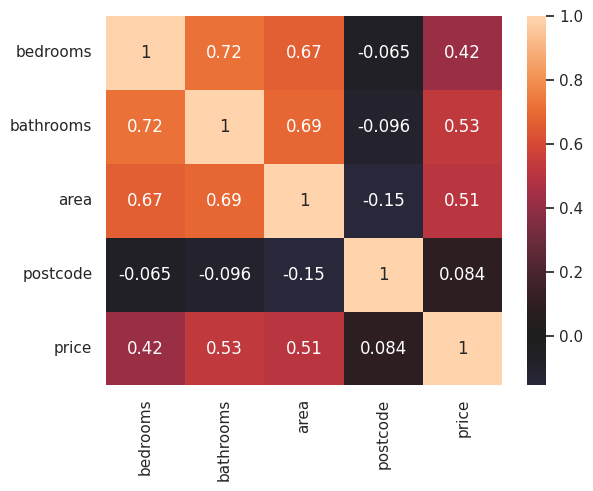

In [ ]:
# 繪製相關熱力圖 房間與廁所可能錯位
sns.set(font_scale=1)
sns.heatmap(df_train.iloc[:,1:6].corr(), center=0, annot=True)
plt.show()

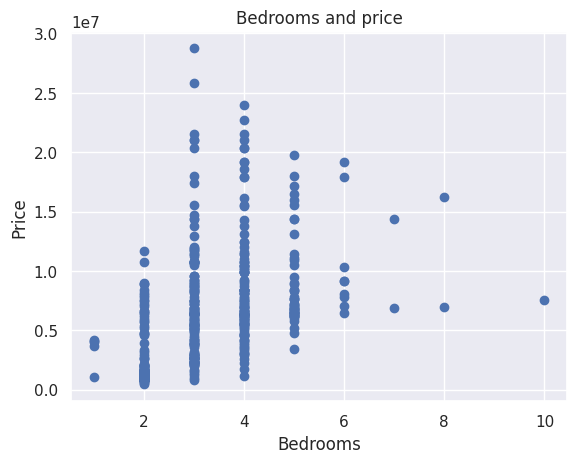

In [ ]:
# 資料視覺化(EDA)
# bedrooms
plt.scatter(df_train.iloc[:,1], df_train.iloc[:,5])
plt.title("Bedrooms and price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

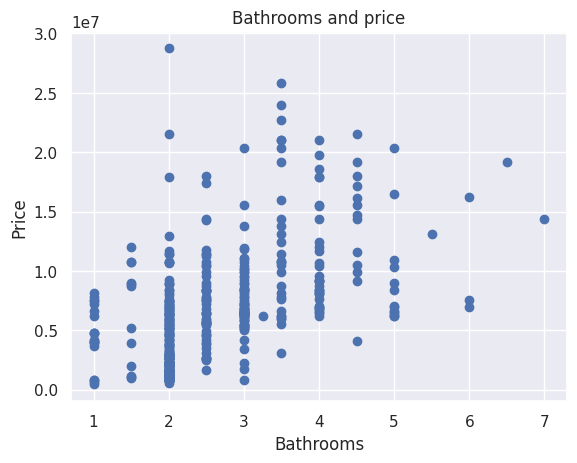

In [ ]:
# bathrooms 廁所0.5間有點奇怪
plt.scatter(df_train.iloc[:,2], df_train.iloc[:,5])
plt.title("Bathrooms and price")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

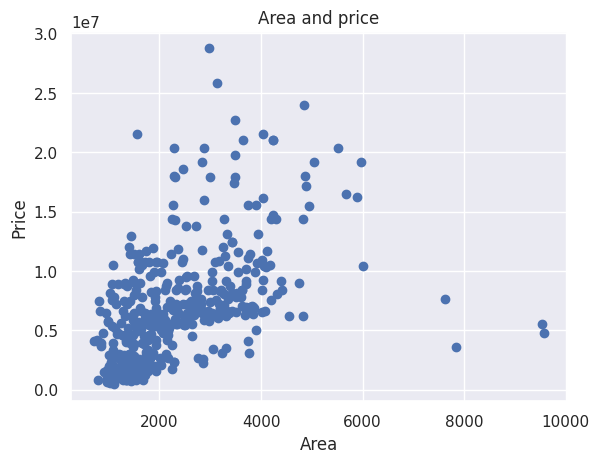

In [ ]:
# area
plt.scatter(df_train.iloc[:,3], df_train.iloc[:,5])
plt.title("Area and price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

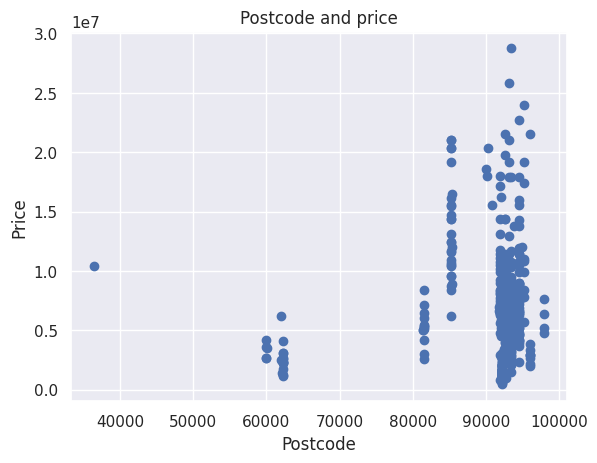

In [ ]:
# postcode
plt.scatter(df_train.iloc[:,4], df_train.iloc[:,5])
plt.title("Postcode and price")
plt.xlabel("Postcode")
plt.ylabel("Price")
plt.show()

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'postcode'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

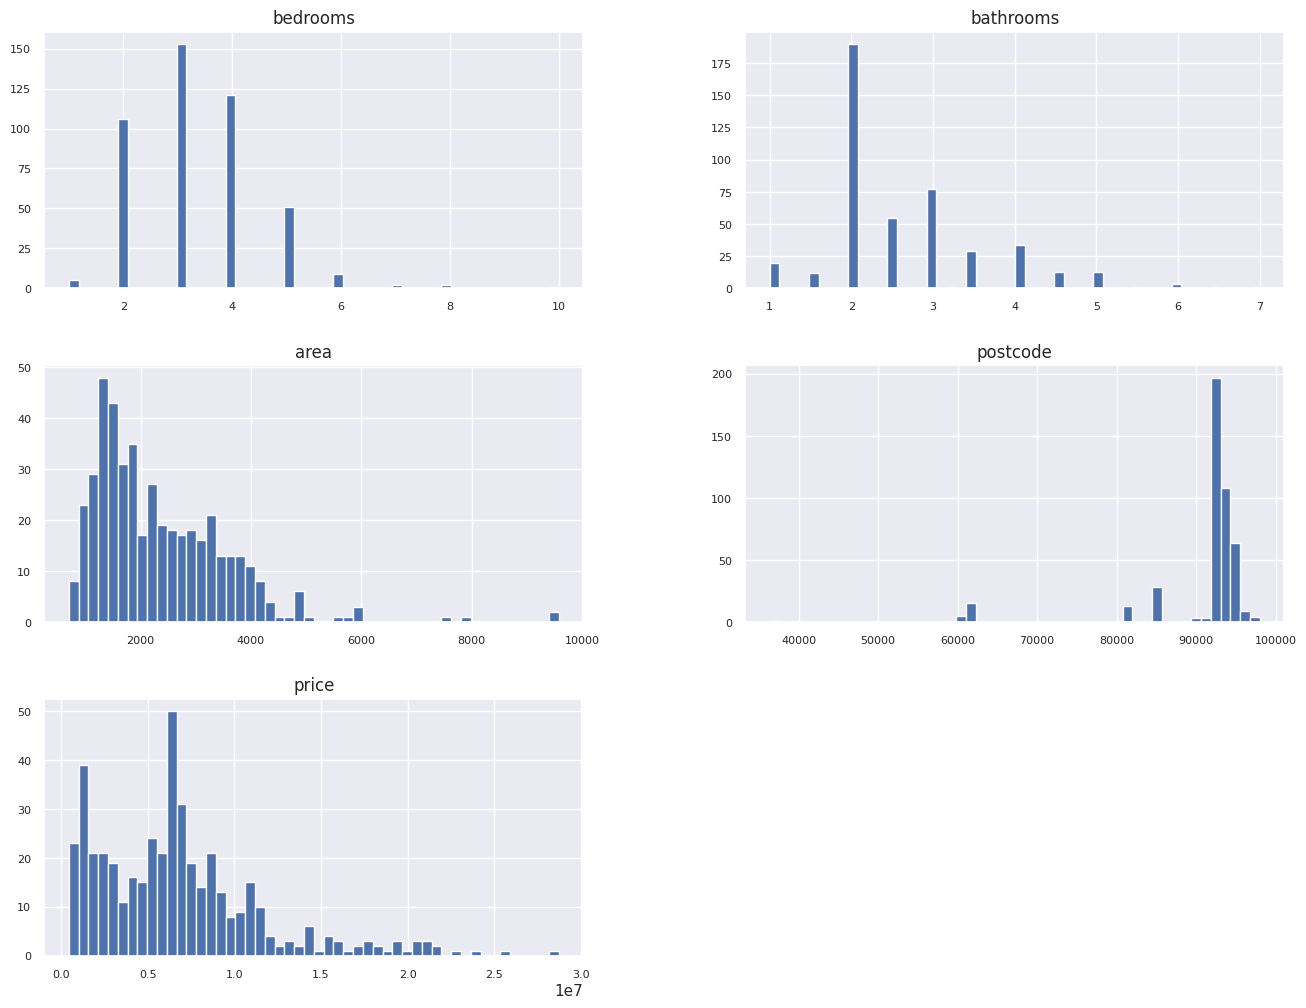

In [ ]:
# 繪製直方圖
df_train.iloc[:,1:6].hist(figsize=(16, 12), bins=50, xlabelsize=8, ylabelsize=8)

# 偏態處理

In [ ]:
# 算偏態係數
from scipy.stats import skew
print(df_train.iloc[:,1:6].skew())
print(df_test.iloc[:,1:6].skew())

bedrooms     0.973808
bathrooms    1.131917
area         1.786025
postcode    -3.663211
price        1.311570
dtype: float64
bedrooms     0.722741
bathrooms    0.620233
area         0.701988
postcode    -4.202679
price        1.346091
dtype: float64


In [ ]:
# 選擇特定欄位做偏態處理
# 作boxcox轉換
from scipy.special import boxcox1p
lam = 0.2
for feat in [2,3]:
    df_train.iloc[:,feat] = boxcox1p(df_train.iloc[:,feat],lam)

In [ ]:
print(df_train.iloc[:,1:6].skew())
print(df_test.iloc[:,1:6].skew())

bedrooms     0.973808
bathrooms    0.500744
area         0.445017
postcode    -3.663211
price        1.311570
dtype: float64
bedrooms     0.722741
bathrooms    0.620233
area         0.701988
postcode    -4.202679
price        1.346091
dtype: float64


# 歸一化

In [ ]:
# 對訓練資料作minmax歸一化
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 計算整個數據的均值方差
scaler.fit(df_train.iloc[:,1:4])
min_ = scaler.data_min_
max_ = scaler.data_max_
# 對數據標準化
df_train.iloc[:,1:4] = scaler.transform(df_train.iloc[:,1:4])

# 對測試數據標準化
print(min_)
print(max_)


[ 1.          0.74349177 13.54545218]
[10.          2.57858283 26.28090904]


In [ ]:
# 歸一化測試集
df_test.iloc[:,1:4] = (df_test.iloc[:,1:4] - min_) / (max_ - min_)

## 切割資料
去除id與postcode

In [ ]:
# 資料切割 去除id與postcode(相關性較低)
x_train = np.array(df_train.loc[:,["bedrooms","bathrooms","area","bathroomphoto","bedroomphoto","housephoto","kitchenphoto"]])
y_train = np.array(df_train.loc[:,"price"]).reshape(-1,1)
x_test = np.array(df_test.loc[:,["bedrooms","bathrooms","area","bathroomphoto","bedroomphoto","housephoto","kitchenphoto"]])
y_test = np.array(df_test.loc[:,"price"]).reshape(-1,1)

## 圖片前處理
1.讀檔 2.視覺化 3.固定大小、歸一化

(575, 767, 3)


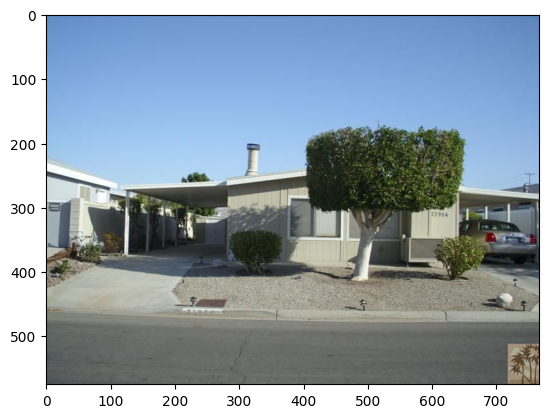

In [ ]:
# 指定圖片路徑
train_img_path = '/content/drive/MyDrive/foresight/Train/1mMJASZHbBPTnCG1.jpg'
test_img_path = '/content/drive/MyDrive/foresight/Test/'
# 讀取圖片
img = plt.imread(train_img_path)
print(img.shape)
# 顯示圖片
plt.imshow(img)
plt.show()

In [ ]:
from PIL import Image

train_img_path = '/content/drive/MyDrive/foresight/Train/'
test_img_path = '/content/drive/MyDrive/foresight/Test/'

target_size = (256, 256)
# img_length = []
# img_width = []
def img_transform(data, path, column):
    img_list = []
    for i in range(len(data)):
        img_path = (path + data[i,column])
        img = Image.open(img_path)
        # img_length.append(img.size[0])
        # img_width.append(img.size[1])
        resized_images = img.resize(target_size, Image.ANTIALIAS)  # 調整大小
        img_array = np.array(resized_images)
        img_array = img_array.astype('float32') / 255.0
        img_list.append(img_array)

    return np.array(img_list)

In [ ]:
# 處理圖片
img1 = img_transform(x_train, train_img_path, 3)
img2 = img_transform(x_train, train_img_path, 4)
img3 = img_transform(x_train, train_img_path, 5)
img4 = img_transform(x_train, train_img_path, 6)

tmg1 = img_transform(x_test, test_img_path, 3)
tmg2 = img_transform(x_test, test_img_path, 4)
tmg3 = img_transform(x_test, test_img_path, 5)
tmg4 = img_transform(x_test, test_img_path, 6)

<ipython-input-13-76f9892c798d>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_images = img.resize(target_size, Image.ANTIALIAS)  # 調整大小


In [ ]:
img1.shape

(450, 256, 256, 3)

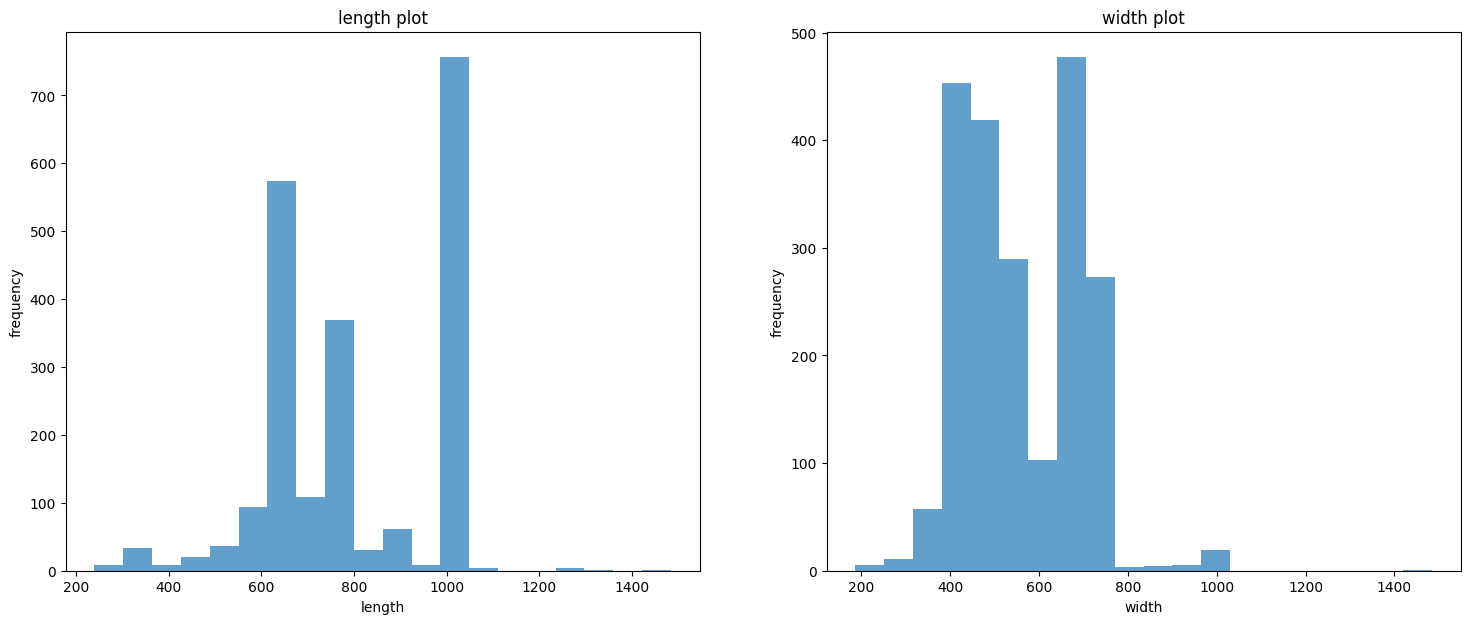

In [ ]:
# 長度分佈圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.hist(img_length, bins=20, alpha=0.7)
plt.xlabel("length")
plt.ylabel('frequency')
plt.title("length plot")

plt.subplot(122)
plt.hist(img_width, bins=20, alpha=0.7)
plt.xlabel("width")
plt.ylabel('frequency')
plt.title("width plot")

plt.show()

# 資料合併
數值資料改為圖形形狀並合併

In [ ]:
# 處理數值
train_shape = (450, 256, 256, 3)
test_shape = (80, 256, 256, 3)
x_train_num = np.zeros(train_shape, dtype=np.float32)
x_test_num = np.zeros(test_shape, dtype=np.float32)

for i in range(train_shape[0]):
    x_train_num[i, :, :, :] = x_train[:,0:3][i]
for i in range(test_shape[0]):
    x_test_num[i, :, :, :] = x_test[:,0:3][i]


In [ ]:
print(x_train_num.shape)
print(x_test_num.shape)

(450, 256, 256, 3)
(80, 256, 256, 3)


In [ ]:
# 將圖像與數值資料合併
x_train_array = np.concatenate((img1, img2, img3, img4, x_train_num), axis=3)
x_test_array = np.concatenate((tmg1, tmg2, tmg3, tmg4, x_test_num), axis=3)

In [ ]:
# 考慮ram不夠
del img1, img2, img3, img4, tmg1, tmg2, tmg3, tmg4

In [ ]:
print(x_train_array.shape)
print(x_test_array.shape)

(450, 256, 256, 15)
(80, 256, 256, 15)


# 建立模型
Resnet解析圖形
與數值concat做全連接層

In [ ]:
# 撰寫RESNET圖形模型
def resnet_block(input_layer):

    leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)
    x=tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),padding='same', activation=leaky_relu)(input_layer)
    x=tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),padding='same', activation=leaky_relu)(x)
    x=tf.keras.layers.MaxPool2D()(x)

    #---------------
    x_shortcut = x

    x=tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Activation(leaky_relu)(x)

    x=tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)

    x=tf.keras.layers.Add()([x, x_shortcut])
    x=tf.keras.layers.Activation(leaky_relu)(x)

    #----------------
    x_shortcut = x

    x=tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Activation(leaky_relu)(x)

    x=tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Activation(leaky_relu)(x)

    x=tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3),padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Add()([x, x_shortcut])

    output=tf.keras.layers.Activation(leaky_relu)(x)

    return output

In [ ]:
# def inception_block(input_layer):

#     # 1x1卷積分支
#     branch1 = Conv2D(filters=16, kernel_size=1, padding='same', activation='relu')(input_layer)

#     # 3x3卷積分支
#     branch2 = Conv2D(filters=16, kernel_size=1, padding='same', activation='relu')(input_layer)
#     branch2 = Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(branch2)

#     # 5x5卷積分支
#     branch3 = Conv2D(filters=16, kernel_size=1, padding='same', activation='relu')(input_layer)
#     branch3 = Conv2D(filters=16, kernel_size=5, padding='same', activation='relu')(branch3)

#     # 池化分支
#     branch4 = MaxPool2D(pool_size=3, strides=1, padding='same')(input_layer)
#     branch4 = Conv2D(filters=16, kernel_size=1, padding='same', activation='relu')(branch4)

#     # 連接所有分支
#     output = Concatenate()([branch1, branch2, branch3, branch4])

#     return output

In [ ]:
# 撰寫模型

input_layer = tf.keras.layers.Input(shape=(256,256,15))

img_input1 = Lambda(lambda x: x[:,:,:,:3])(input_layer)
img_input2 = Lambda(lambda x: x[:,:,:,3:6])(input_layer)
img_input3 = Lambda(lambda x: x[:,:,:,6:9])(input_layer)
img_input4 = Lambda(lambda x: x[:,:,:,9:12])(input_layer)
num_input = Lambda(lambda x: x[:,:,:,12:])(input_layer)


x1_features = resnet_block(img_input1)
x2_features = resnet_block(img_input2)
x3_features = resnet_block(img_input3)
x4_features = resnet_block(img_input4)

num_input = Conv2D(filters=12, kernel_size=(1, 1), activation='relu')(num_input)
num_features = tf.keras.layers.MaxPool2D()(num_input)

features = Concatenate()([x1_features, x2_features, x3_features, x4_features, num_features])
features = tf.keras.layers.AveragePooling2D()(features)

# Flatten the features
flat_features = tf.keras.layers.Flatten()(features)
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)
x = tf.keras.layers.Dense(32, activation=leaky_relu)(flat_features)
x = tf.keras.layers.Dense(16, activation=leaky_relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = Dense(1)(x)

In [ ]:
model = tf.keras.models.Model(inputs = input_layer, outputs = output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 15)]       0         []                            
                                                                                                  
 lambda (Lambda)             (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 lambda_2 (Lambda)           (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                              

In [ ]:
# 模型最佳化
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
              loss="mean_squared_error",
              metrics=['mean_squared_error', 'mean_absolute_error',
                  tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# data augmentation設定
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
# 將訓練的模型置放於model_path下的model_name
model_name = 'predict7_resnet_numgen'

save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)

In [ ]:
# 設定模型存放方式(只存Validation表現最好的那一次)
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor = 'val_loss', save_best_only = True, verbose = 1)

# 設定多久沒進步就停下來
earlystop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

In [ ]:
# 開始訓練，順便把訓練過程存到model_history，方便後續畫圖
model_history = model.fit(datagen.flow(x_train_array, y_train, batch_size=16),
    epochs=100,
    steps_per_epoch = len(x_train) // 16,
    validation_data=(x_test_array, y_test),
    callbacks=[earlystop, checkpoint]
)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (450, 256, 256, 15) (15 channels).
  warnings.warn(


Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 68929133215744.0000 - mean_squared_error: 68929133215744.0000 - mean_absolute_error: 6754036.5000 - root_mean_squared_error: 8302357.0000
Epoch 1: val_loss improved from inf to 78967981735936.00000, saving model to /content/saved_models/predict7_resnet_numgen
28/28 [==============================] - 77s 2s/step - loss: 68929133215744.0000 - mean_squared_error: 68929133215744.0000 - mean_absolute_error: 6754036.5000 - root_mean_squared_error: 8302357.0000 - val_loss: 78967981735936.0000 - val_mean_squared_error: 78967981735936.0000 - val_mean_absolute_error: 7212801.5000 - val_root_mean_squared_error: 8886393.0000
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 68373840920576.0000 - mean_squared_error: 68373840920576.0000 - mean_absolute_error: 6723642.5000 - root_mean_squared_error: 8268847.5000
Epoch 2: val_loss improved from 78967981735936.00000 to 78774397829120.00000, saving model to /content/

## 畫圖

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'val_root_mean_squared_error'])

In [ ]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

training_mae = model_history.history['mean_absolute_error']
val_mae = model_history.history['val_mean_absolute_error']

training_rmse = model_history.history['root_mean_squared_error']
val_rmse = model_history.history['val_root_mean_squared_error']

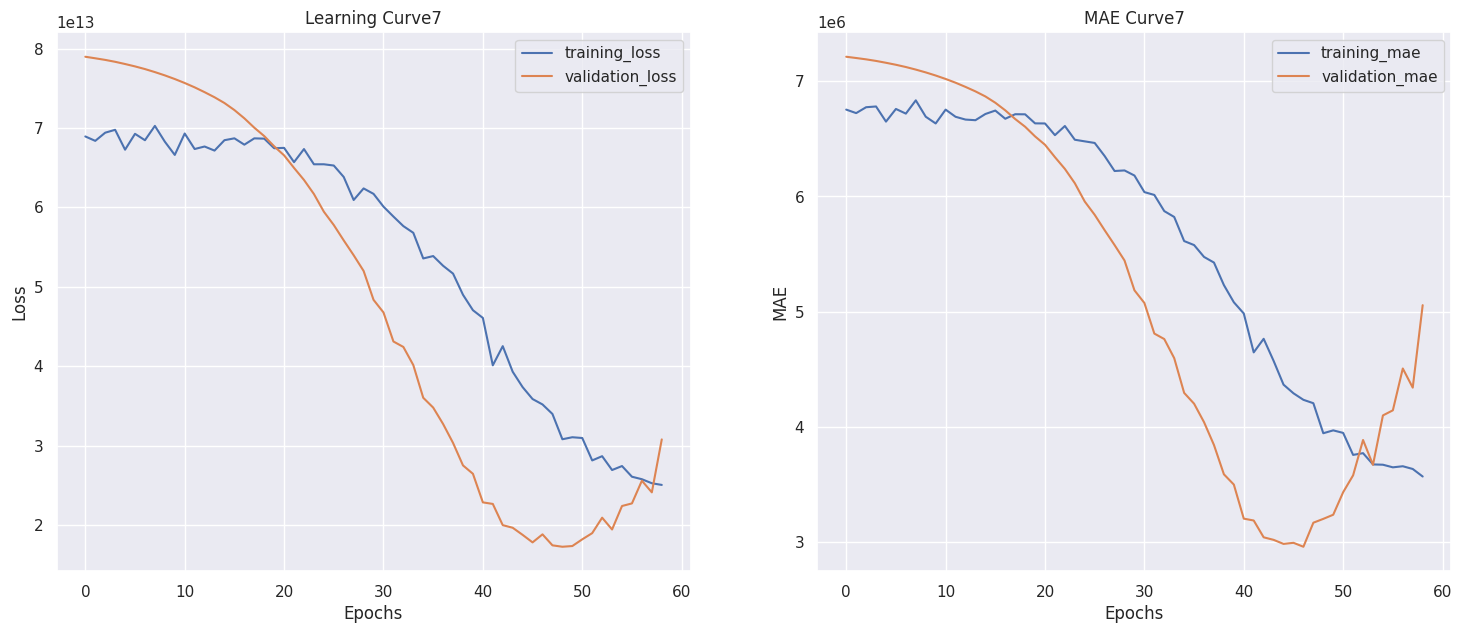

In [ ]:
# model7 畫圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve7")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(training_mae, label="training_mae")
plt.plot(val_mae, label="validation_mae")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("MAE Curve7")
plt.legend(loc='best')

plt.show()

## 預測結果

In [ ]:
#載入訓練好的模型
model = tf.keras.models.load_model(model_path)

In [ ]:
#使用AI模型作預測
pred = model.predict(x_test_array)

3/3 [==============================] - 2s 139ms/step


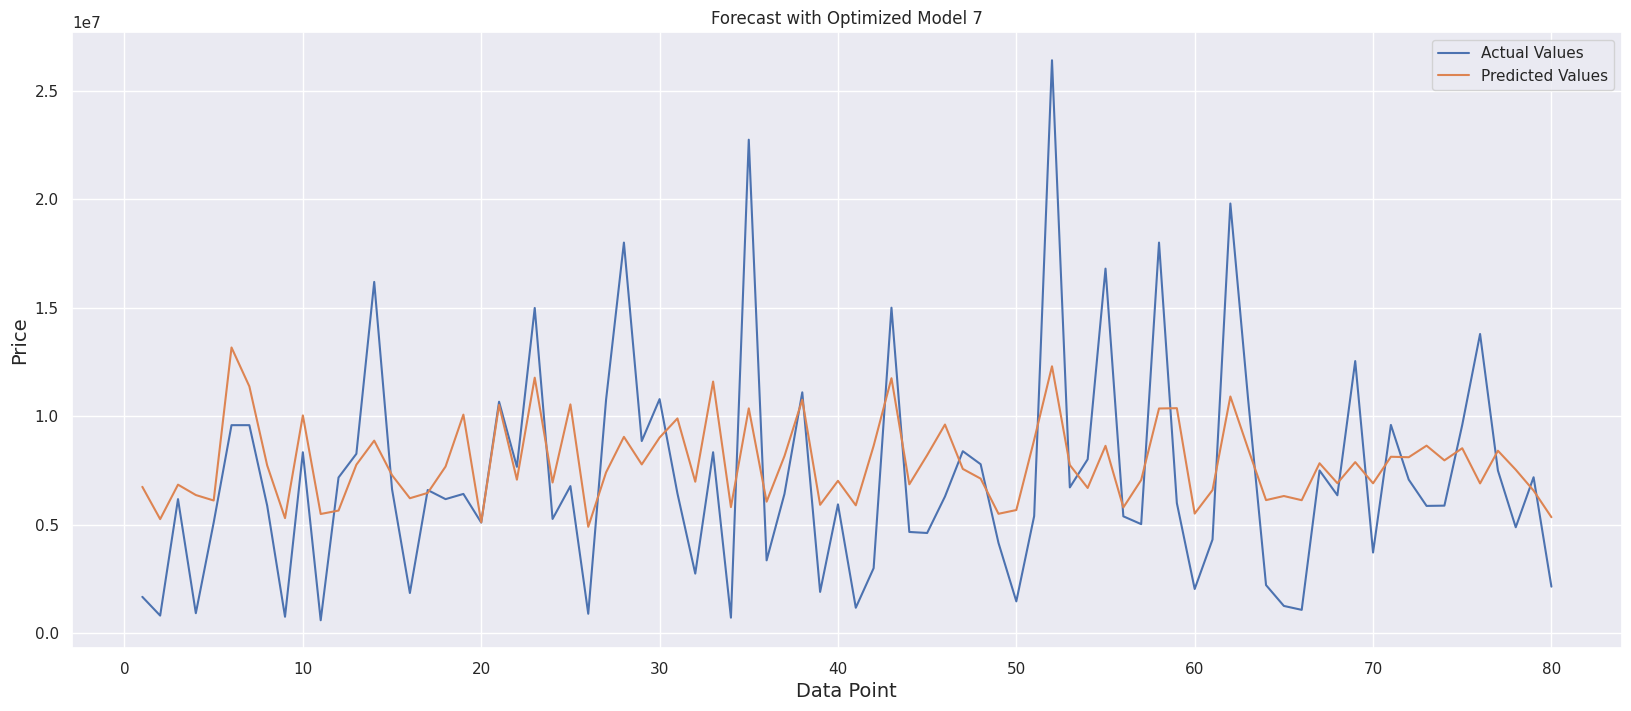

In [ ]:
# visualize the model  7
plt.figure(figsize=(20, 8))
plt.title("Forecast with Optimized Model 7")
plt.xlabel("Data Point", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.plot(range(1, 81), y_test, label="Actual Values")
plt.plot(range(1, 81), pred, label="Predicted Values")
plt.legend()
plt.show()

In [ ]:
# 第七次結果
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, model.predict(x_test_array))
mse = mean_squared_error(y_test, model.predict(x_test_array))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print("=====第七次結果======")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2_score:", r2)

3/3 [==============================] - 0s 117ms/step
=====第七次結果======
MAE: 3202100.975
MSE: 17251344947654.188
RMSE: 4153473.840973865
R2_score: 0.3603781467541637


# 優化紀錄
1. inception模型concat後維度過大跑不出來
2. 改resnet速度快有結果, 開始做模型優化
3. filter=4改8, lr=0.0001改0.00005, epoch調大 ==> val loss有下降的趨勢
4. 增加資料增強 ==> val loss下降的趨勢更明顯, 但結果還是很不好
5. 圖形128改256, 看能不能學到重要特徵 ==> loss有下降的趨勢更明顯, 但結果還是不好
6. 有偏態的數值特徵做boxcox, 改leaky relu ==> 結果有好一點
7. 將數值的資料維度從3增加為12, epoch改100 ==> 結果好很多, 50epoch後有ovefitting


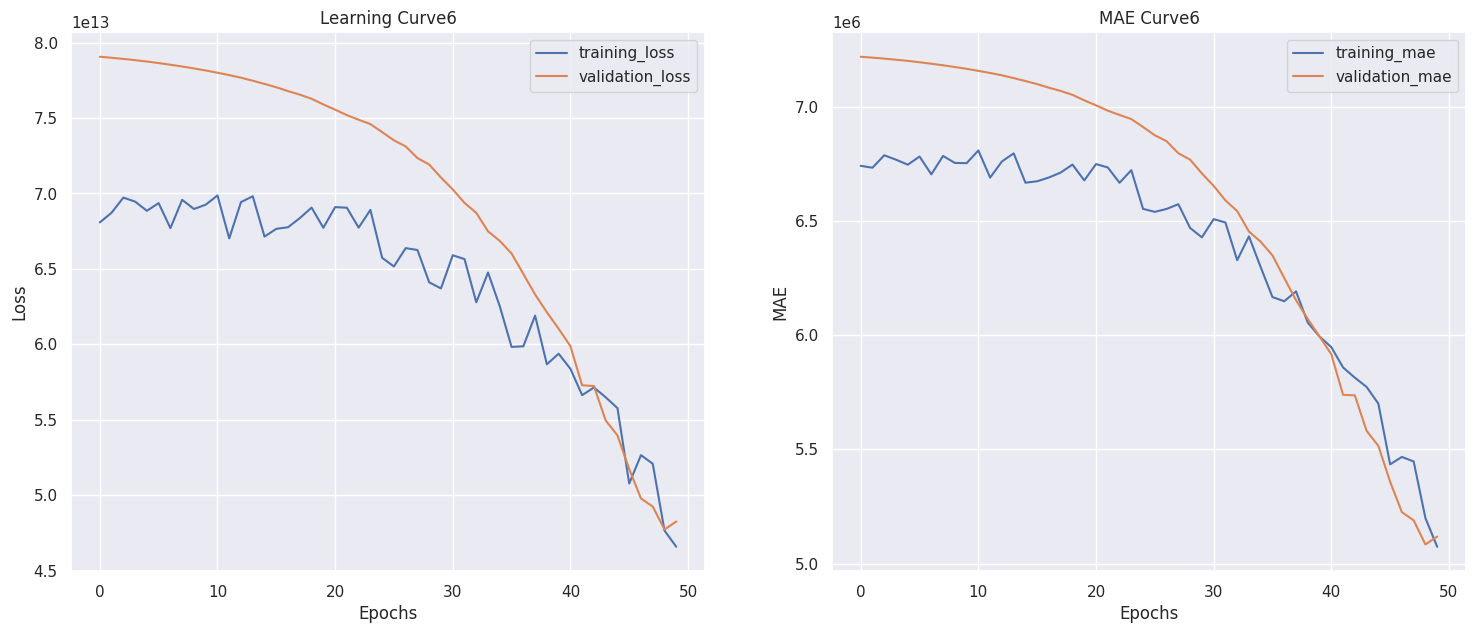

In [ ]:
# model6 畫圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve6")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(training_mae, label="training_mae")
plt.plot(val_mae, label="validation_mae")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("MAE Curve6")
plt.legend(loc='best')

plt.show()

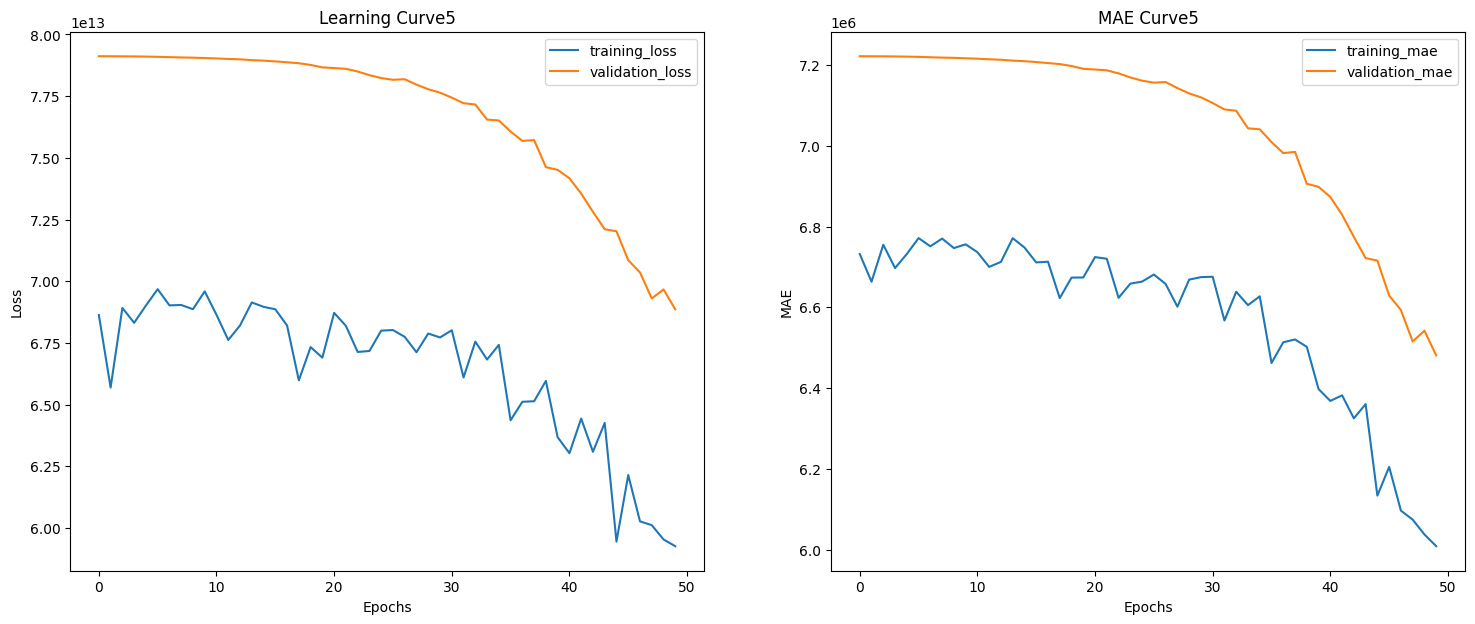

In [ ]:
# model5 畫圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve5")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(training_mae, label="training_mae")
plt.plot(val_mae, label="validation_mae")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("MAE Curve5")
plt.legend(loc='best')

plt.show()

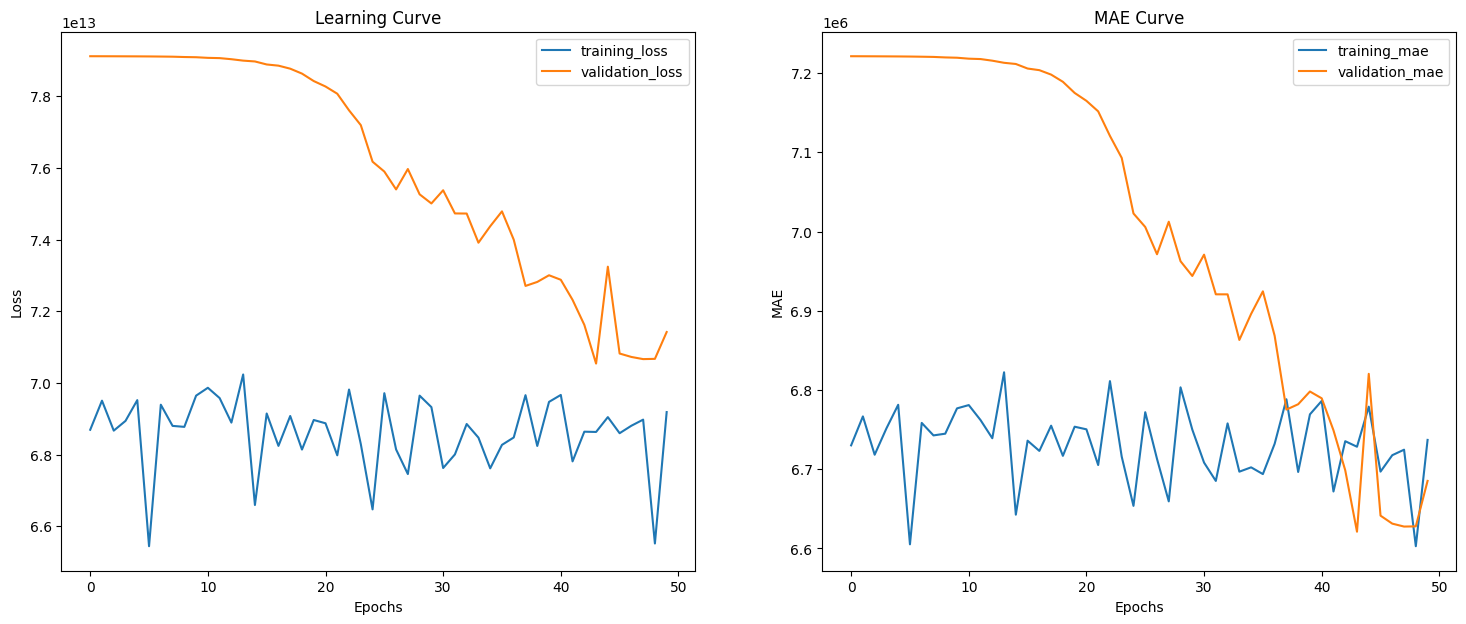

In [ ]:
# model4 畫圖
plt.figure(figsize=(18, 7))
plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.subplot(122)
plt.plot(training_mae, label="training_mae")
plt.plot(val_mae, label="validation_mae")
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("MAE Curve")
plt.legend(loc='best')

plt.show()

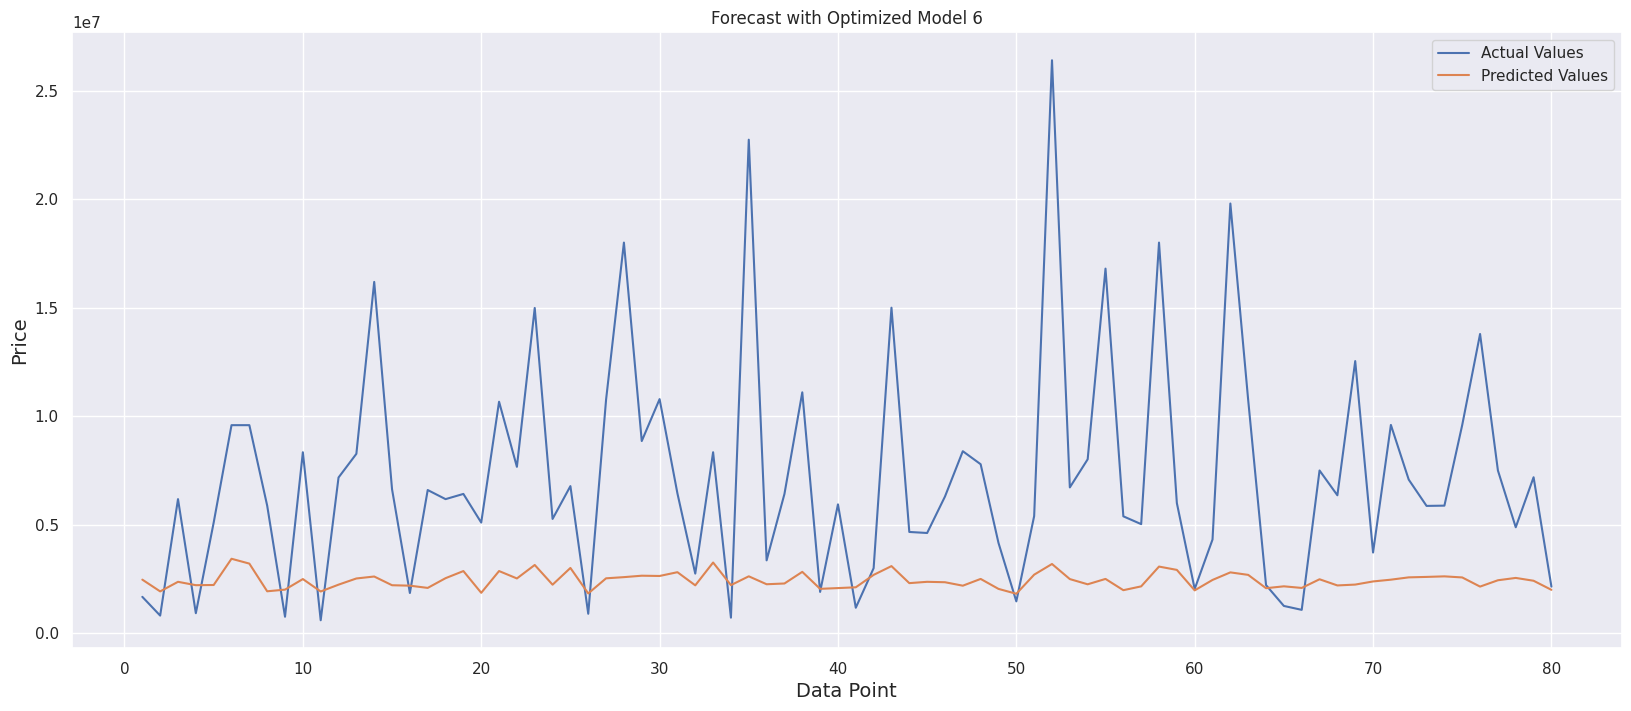

In [ ]:
# visualize the model  6
plt.figure(figsize=(20, 8))
plt.title("Forecast with Optimized Model 6")
plt.xlabel("Data Point", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.plot(range(1, 81), y_test, label="Actual Values")
plt.plot(range(1, 81), pred, label="Predicted Values")
plt.legend()
plt.show()

In [ ]:
# 第六次結果
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, model.predict(x_test_array))
mse = mean_squared_error(y_test, model.predict(x_test_array))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print("=====第六次結果======")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2_score:", r2)

3/3 [==============================] - 0s 112ms/step
=====第六次結果======
MAE: 5083658.609375
MSE: 47736973475183.34
RMSE: 6909194.8499939805
R2_score: -0.7699264338631184


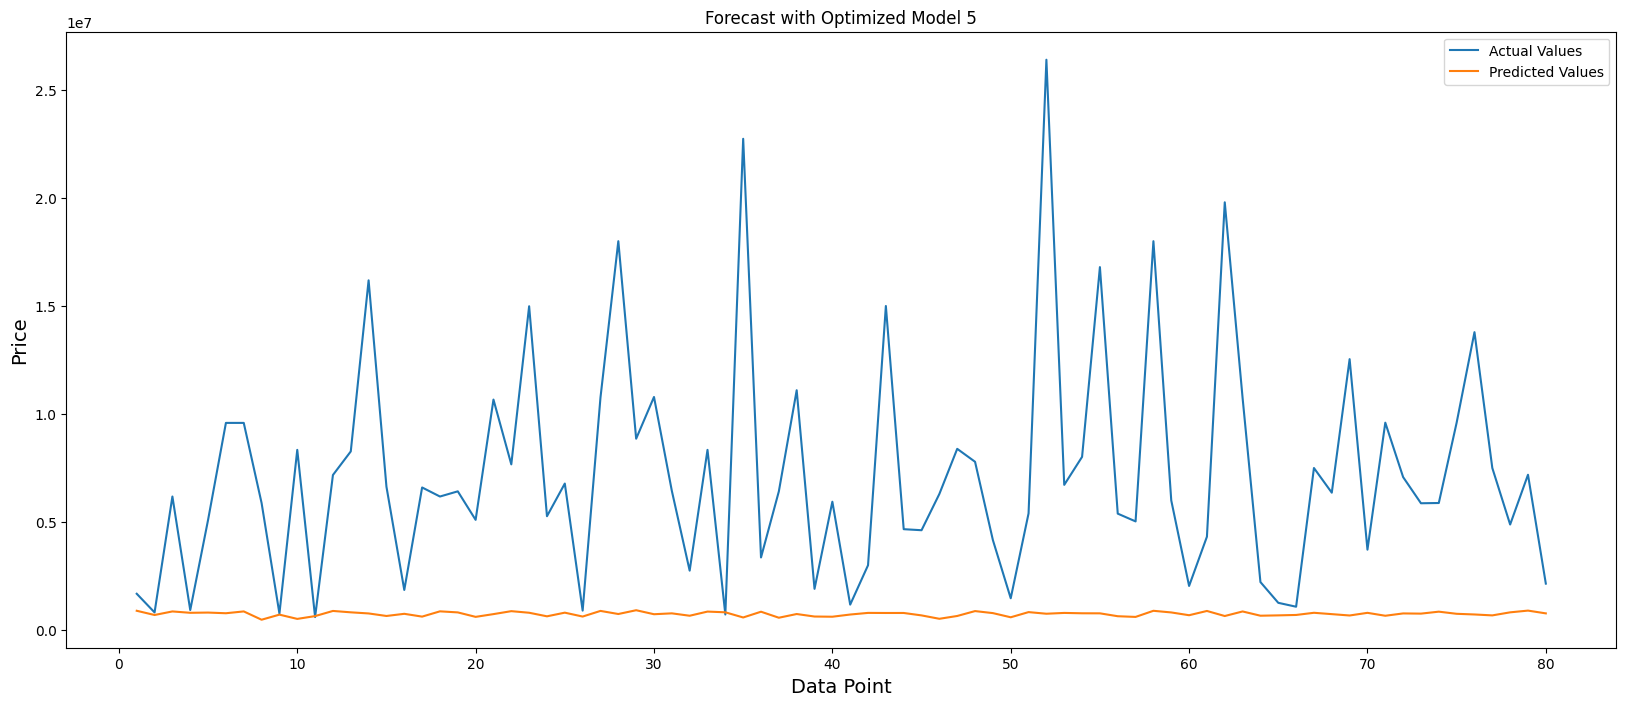

In [ ]:
# visualize the model 5
plt.figure(figsize=(20, 8))
plt.title("Forecast with Optimized Model 5")
plt.xlabel("Data Point", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.plot(range(1, 81), y_test, label="Actual Values")
plt.plot(range(1, 81), pred, label="Predicted Values")
plt.legend()
plt.show()

In [ ]:
# 第五次結果
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, model.predict(x_test_array))
mse = mean_squared_error(y_test, model.predict(x_test_array))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print("=====第五次結果======")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2_score:", r2)

3/3 [==============================] - 0s 96ms/step
=====第五次結果======
MAE: 6481125.1046875
MSE: 68858483228023.836
RMSE: 8298101.182079177
R2_score: -1.5530409824652485


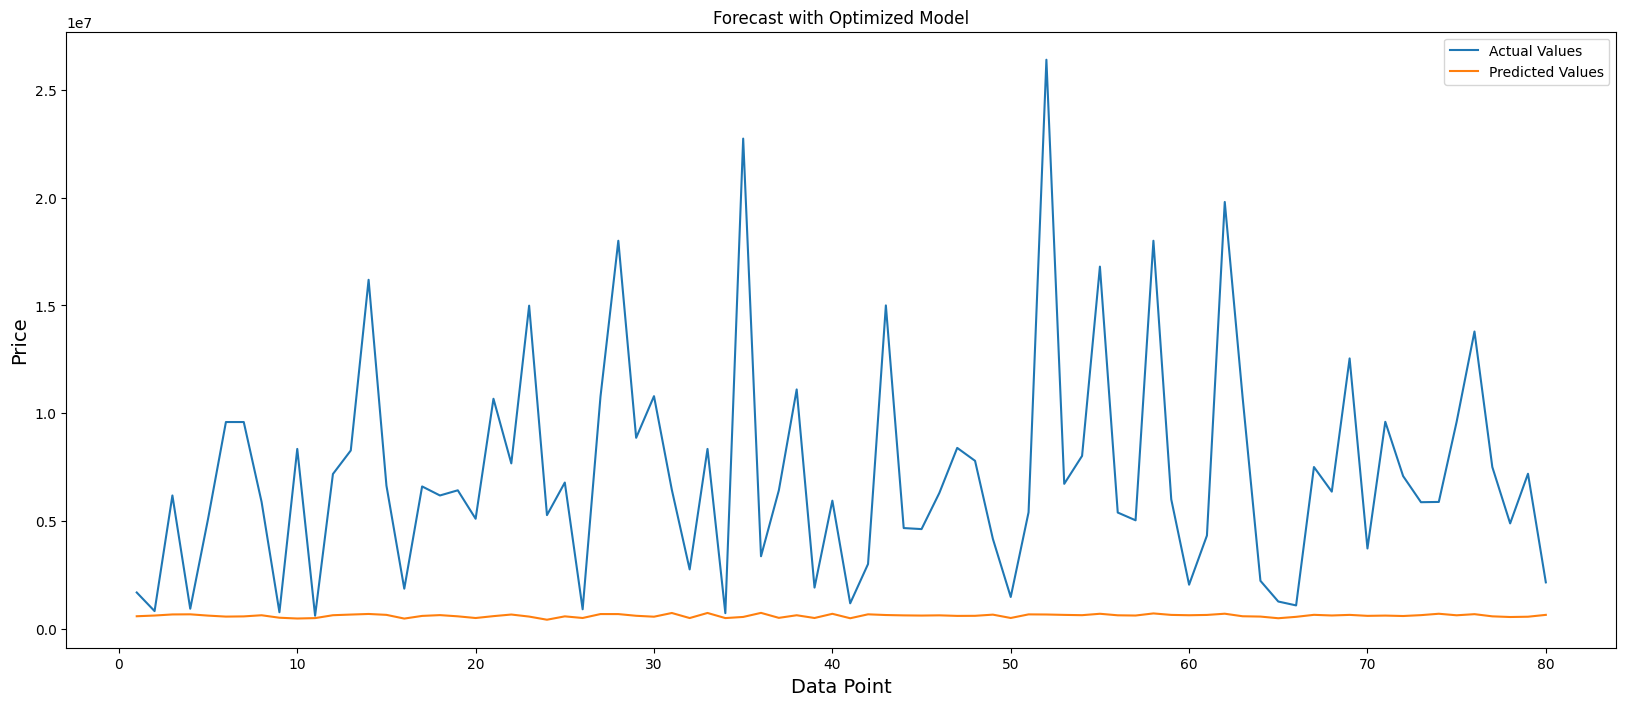

In [ ]:
# visualize the model 4
plt.figure(figsize=(20, 8))
plt.title("Forecast with Optimized Model")
plt.xlabel("Data Point", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.plot(range(1, 81), y_test, label="Actual Values")
plt.plot(range(1, 81), pred, label="Predicted Values")
plt.legend()
plt.show()

In [ ]:
# 第四次結果
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, model.predict(x_test_array))
mse = mean_squared_error(y_test, model.predict(x_test_array))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2_score:", r2)

3/3 [==============================] - 0s 39ms/step
MAE: 6621128.594921875
MSE: 70542221212088.62
RMSE: 8398941.672144689
R2_score: -1.6154683243922539
